Ignore this cell if you are using custom ide

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing some useful libraries

In [ ]:
import os
import random
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image


Save dataset direction

In [ ]:
# using custom ide
# img = os.listdir('UTKFace')
# using google colab
img = os.listdir('/content/drive/MyDrive/UTKFace')
print(f"Dataset contain {len(img)} samples")

Dataset contain 23718 samples


Labeling and grouping images

In [ ]:
gender_labels = []
gender = []
age_labels = []
age = []

for i in img :

    gender.append(i)
    gender_labels.append( int(i.split('_')[1]) )

    sample_age = int( i.split('_')[0] )

    if sample_age < 17 :
        age_labels.append(0)
        age.append(i)

    elif sample_age > 20 and sample_age < 27 :
        age_labels.append(1)
        age.append(i)

    elif sample_age > 30 and sample_age < 50 :
        age_labels.append(2)
        age.append(i)

    elif sample_age > 54 :
        age_labels.append(3)
        age.append(i)


Reading and resizing images

In [ ]:
age_data=[]
for i in age:
    # without colab
    # image=cv.imread('UTKFace/'+i,0)
    # with colab
    image=cv.imread('/content/drive/MyDrive/UTKFace/'+i,0)
    image = cv.resize(image,(128,128))
    age_data.append(np.array(image))


In [ ]:
gender_data=[]
for i in gender:
    # without colab
    # image=cv.imread('UTKFace/'+i,0)
    # with colab
    image=cv.imread('/content/drive/MyDrive/UTKFace/'+i,0)
    image = cv.resize(image,(128,128))
    gender_data.append(np.array(image))


Rescaling images

In [ ]:
age_data = np.array(age_data)
age_data = age_data.astype('float32')
age_data /= 255.0
print(age_data.shape)

(18743, 128, 128)


In [ ]:
gender_data = np.array(gender_data)
gender_data = gender_data.astype('float32')
gender_data /= 255.0
print(gender_data.shape)

gender_labels = np.array(gender_labels)

(23718, 128, 128)


Convert age labels to categorical form and spliting data into test and train

In [ ]:
age_labels=np_utils.to_categorical(age_labels, 4)
age_data, age_labels = shuffle(age_data, age_labels)
x_train1, x_test1, y_train1, y_test1 = train_test_split(age_data, age_labels, test_size=0.1)

In [ ]:
gender_data, gender_labels = shuffle(gender_data, gender_labels)
x_train2, x_test2, y_train2, y_test2 = train_test_split(gender_data, gender_labels, test_size=0.1)

In [ ]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)


(16868, 128, 128)
(16868, 4)
(1875, 128, 128)
(1875, 4)


In [ ]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(21346, 128, 128)
(21346,)
(2372, 128, 128)
(2372,)


Age detecion model

In [ ]:
age_CNN = Sequential()

age_CNN.add(InputLayer(input_shape=(128, 128, 1)))

age_CNN.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
age_CNN.add(Conv2D(filters=16, kernel_size=3, activation='relu'))

age_CNN.add(MaxPooling2D(pool_size=2))
age_CNN.add(Dropout(0.3))

age_CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
age_CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
age_CNN.add(MaxPooling2D(pool_size=2))
age_CNN.add(Dropout(0.3))

age_CNN.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
age_CNN.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
age_CNN.add(MaxPooling2D(pool_size=2))
age_CNN.add(Dropout(0.3))

age_CNN.add(Flatten())

age_CNN.add(Dense(128, activation='relu'))
age_CNN.add(Dropout(0.5))
age_CNN.add(Dense(4, activation='softmax'))

age_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        9248      
                                                        

Gender classification model

In [ ]:
gender_CNN = Sequential()

gender_CNN.add(InputLayer(input_shape=(128, 128, 1)))

gender_CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
gender_CNN.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
gender_CNN.add(MaxPooling2D(pool_size=2))
gender_CNN.add(Dropout(0.3))

gender_CNN.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
gender_CNN.add(MaxPooling2D(pool_size=2))
gender_CNN.add(Dropout(0.3))

gender_CNN.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
gender_CNN.add(MaxPooling2D(pool_size=2))
gender_CNN.add(Dropout(0.3))

gender_CNN.add(Flatten())
gender_CNN.add(Dense(64, activation='relu'))
gender_CNN.add(Dropout(0.5))
gender_CNN.add(Dense(32, activation='relu'))
gender_CNN.add(Dropout(0.5))
gender_CNN.add(Dense(8, activation='relu'))
gender_CNN.add(Dense(1, activation='sigmoid'))

gender_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 conv2d_11 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

Compiling models

In [ ]:
age_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
gender_CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training age model

In [ ]:
history1 = age_CNN.fit(x_train1, y_train1, validation_split=0.1, epochs=15, shuffle=True , batch_size=64)

Epoch 1/15
238/238 [==============================] - 23s 43ms/step - loss: 1.2395 - accuracy: 0.4138 - val_loss: 0.9400 - val_accuracy: 0.6046
Epoch 2/15
238/238 [==============================] - 9s 40ms/step - loss: 0.9436 - accuracy: 0.5926 - val_loss: 0.8390 - val_accuracy: 0.6520
Epoch 3/15
238/238 [==============================] - 10s 41ms/step - loss: 0.8586 - accuracy: 0.6322 - val_loss: 0.7704 - val_accuracy: 0.6906
Epoch 4/15
238/238 [==============================] - 10s 40ms/step - loss: 0.7992 - accuracy: 0.6544 - val_loss: 0.7013 - val_accuracy: 0.7072
Epoch 5/15
238/238 [==============================] - 10s 40ms/step - loss: 0.7796 - accuracy: 0.6684 - val_loss: 0.6821 - val_accuracy: 0.7244
Epoch 6/15
238/238 [==============================] - 10s 40ms/step - loss: 0.7467 - accuracy: 0.6787 - val_loss: 0.6719 - val_accuracy: 0.7273
Epoch 7/15
238/238 [==============================] - 10s 40ms/step - loss: 0.7283 - accuracy: 0.6896 - val_loss: 0.6576 - val_accuracy: 

Ploting loss and accuracy

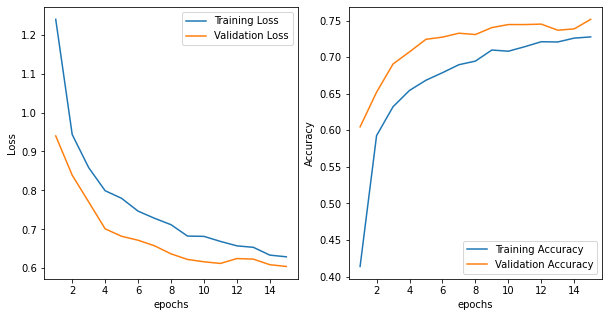

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot([index for index in range(1, 16)], history1.history['loss'], label='Training Loss')
plt.plot([index for index in range(1, 16)], history1.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot([index for index in range(1, 16)], history1.history['accuracy'], label='Training Accuracy')
plt.plot([index for index in range(1, 16)], history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

Ploting age model layers

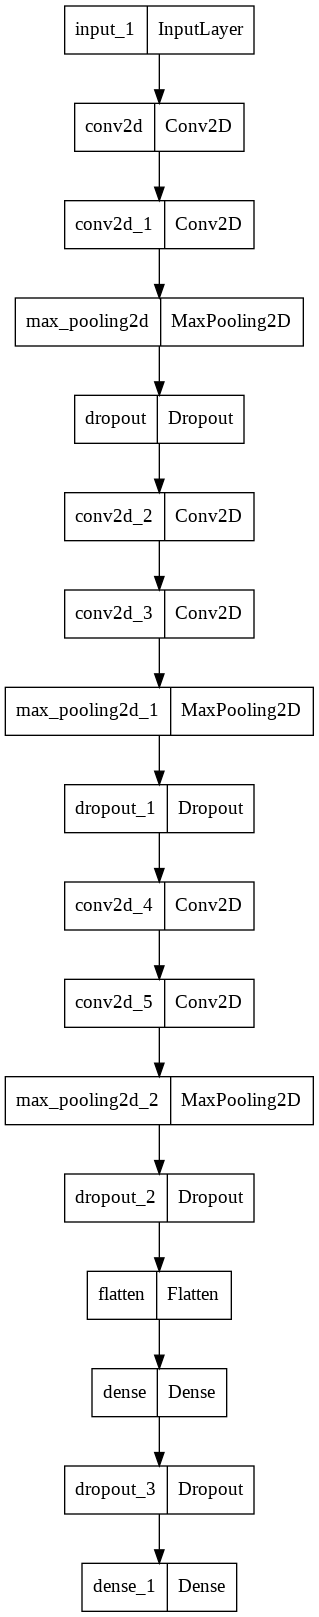

In [ ]:
tf.keras.utils.plot_model(age_CNN)

Evaluate age model on testing data

In [ ]:
age_CNN.evaluate(x_test1,y_test1)

59/59 [==============================] - 1s 10ms/step - loss: 0.5806 - accuracy: 0.7509


[0.5806346535682678, 0.7509333491325378]

Training gender model

In [ ]:
history2 = gender_CNN.fit(x_train2, y_train2, validation_split=0.1 ,epochs=20, shuffle = True, batch_size=128)

Epoch 1/20
151/151 [==============================] - 19s 121ms/step - loss: 0.6765 - accuracy: 0.5624 - val_loss: 0.5842 - val_accuracy: 0.7260
Epoch 2/20
151/151 [==============================] - 18s 119ms/step - loss: 0.5264 - accuracy: 0.7448 - val_loss: 0.4098 - val_accuracy: 0.8178
Epoch 3/20
151/151 [==============================] - 18s 117ms/step - loss: 0.4487 - accuracy: 0.7948 - val_loss: 0.3724 - val_accuracy: 0.8351
Epoch 4/20
151/151 [==============================] - 18s 116ms/step - loss: 0.3979 - accuracy: 0.8233 - val_loss: 0.3523 - val_accuracy: 0.8496
Epoch 5/20
151/151 [==============================] - 18s 117ms/step - loss: 0.3709 - accuracy: 0.8372 - val_loss: 0.3151 - val_accuracy: 0.8609
Epoch 6/20
151/151 [==============================] - 18s 117ms/step - loss: 0.3539 - accuracy: 0.8466 - val_loss: 0.3215 - val_accuracy: 0.8562
Epoch 7/20
151/151 [==============================] - 18s 117ms/step - loss: 0.3421 - accuracy: 0.8533 - val_loss: 0.3028 - val_ac

Ploting loss and accuracy

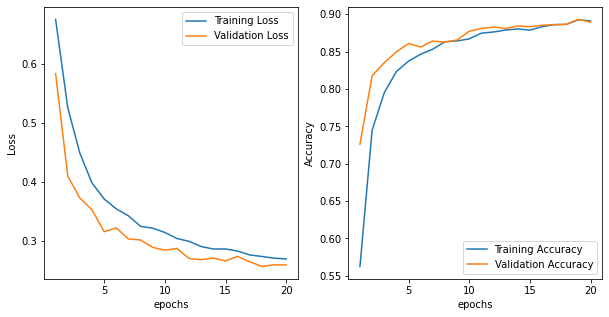

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot([index for index in range(1, 21)], history2.history['loss'], label='Training Loss')
plt.plot([index for index in range(1, 21)], history2.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot([index for index in range(1, 21)], history2.history['accuracy'], label='Training Accuracy')
plt.plot([index for index in range(1, 21)], history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

Saving models

In [ ]:
age_CNN.save("AGE_CNN")

INFO:tensorflow:Assets written to: AGE_CNN/assets


In [ ]:
gender_CNN.save("GENDER_CNN")

INFO:tensorflow:Assets written to: GENDER_CNN/assets


INFO:tensorflow:Assets written to: GENDER_CNN/assets


Ploting gender model layers

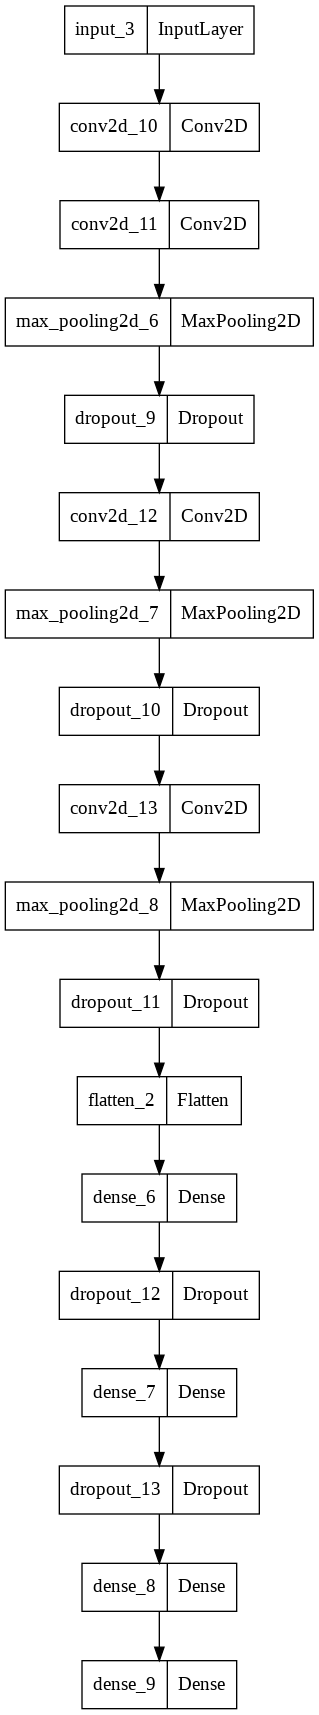

In [ ]:
tf.keras.utils.plot_model(gender_CNN)

Evaluate gender model on testing data

In [ ]:
gender_CNN.evaluate(x_test2,y_test2)

75/75 [==============================] - 1s 13ms/step - loss: 0.2272 - accuracy: 0.9051


[0.2272363007068634, 0.9051433205604553]

Define some useful function for making prediction

In [ ]:
def age_in_year(label):
    age1 = ["[1-16]","[17-28]","[29-54]","[>54]"]
    return age1[int(label)]
def gender_of_person(label):
    gender1 = [ "Male" , "Female"]
    if label < 0.5:
      return gender1[0]
    else:
      return gender1[1]

Plot some prediction from testing images

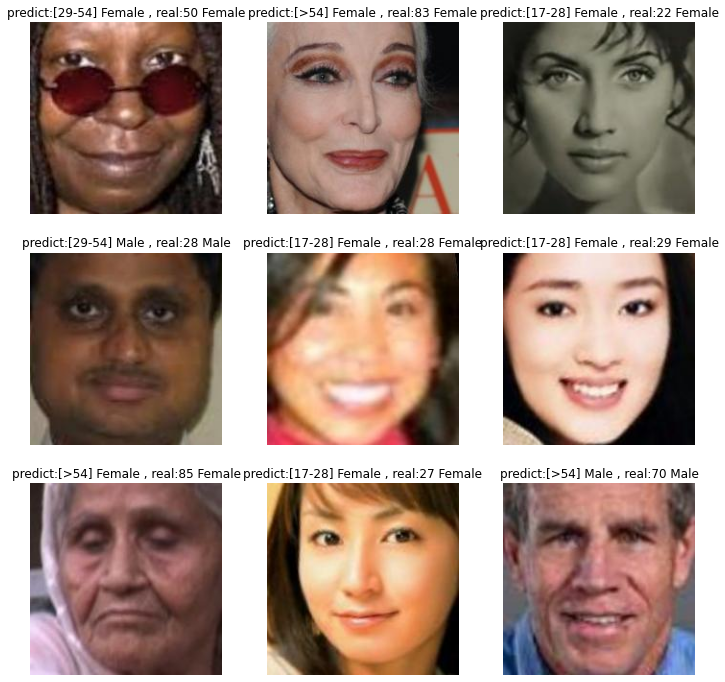

In [ ]:
indices = np.random.randint(0, len(img), 9)
plt.figure(figsize=(12, 12))
for i in range(len(indices)):
    plt.subplot(3, 3, i + 1)
    color_image = cv.imread('/content/drive/MyDrive/UTKFace/'+img[indices[i]])
    color_image = cv.cvtColor(color_image , cv.COLOR_BGR2RGB)
    plt.imshow(color_image)
    image = cv.imread('/content/drive/MyDrive/UTKFace/'+img[indices[i]],0)
    image = cv.resize(image,(128,128))
    image = np.array(image)
    a = age_in_year(np.argmax(age_CNN.predict(np.expand_dims(image, 0))))
    g = gender_of_person(gender_CNN.predict(np.expand_dims(image, 0)))
    a1 = int(img[indices[i]].split('_')[0])
    g1 = gender_of_person(int(img[indices[i]].split('_')[1]))
    plt.title(f'predict:{a} {g} , real:{a1} {g1}')
    plt.axis("off")

